<a href="https://colab.research.google.com/github/geocarvalho/python-ds/blob/master/alura/deep_learning_1/deep_learning_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from google.colab import files

# Abrindo e visualizando o dataset

In [9]:
dataset = keras.datasets.fashion_mnist
# 2 tuplas, treino e teste
((X_train, y_train), (X_test, y_test)) = dataset.load_data()
# Normalização para redução da perda
X_train = X_train / 255.0
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

* Deep learning tem funçẽs que extraem características das imagens;
* Enquanto o modelo de Machine Learning aprende com as características que nomeamos, as funções de Deep Learning extraem essas características, pois entendem quais características são essas. Lembrando que essa extração não precisa ser apenas para imagens ou problemas de classificação, podemos aplicar essa técnica para outros tipos de dados e problemas;
* O MNIST (site em inglês) é um conjunto de imagens de números escritos à mão, e o seu nome significa literalmente que é um dataset Modificado do Instituto Nacional de Padrões e Tecnologia (em inglês Modified National Institute of Standards and Technology database). E por que modificado? Porque já havia um dataset chamado NIST (do Instituto Nacional de Padrões e Tecnologia) que tinha sido formado por imagens de números escritos à mão coletados de um escritório norte americano responsável pelo censo e também de estudantes do colegial;
* Então, agora sabemos que antes tinha o NIST, e depois o MNIST que modificou o NIST. Logo, o MNIST pegou as imagens de números no NIST, formatou essas imagens em 28x28 pixels e as deixou em escala de cinza. Ele possui 60.000 imagens para treino e 10.000 imagens para teste;
* Após a criação do MNIST, ele acabou virando o padrão de uso para o aprendizado de máquina, e resultados próximos a uma identificação humana de dígitos foram atingidos com ele. O que tornou a tarefa de reconhecer dígitos mais fácil, tão fácil que entender esse dataset parou de ser algo desafiador para os modelos da época;
* E aí surgiu o EMNIST (arquivo em inglês), com E de extensão. E, do mesmo modo que o MNIST tinha herdado do NIST, o EMNIST herdou a “estrutura” do MNIST e adicionou letras aos números. Agora, tínhamos um dataset com números e letras;
* Mas, ao começar a usar o dataset, as letras do EMNIST ainda ficavam muito próximas dos números, o que não foi o bastante para aumentar a complexidade da tarefa. As pessoas criando modelos e fazendo pesquisa ainda queriam algo mais desafiador. E agora? Uma resposta foi mudar o padrão original “alfa-numérico” e identificar imagens de roupas de uma loja alemã chamada Zalando (site em inglês), criando assim o Fashion MNIST (github em inglês);
* Há muitas bases disponíveis, como as da [Kaggle](https://www.kaggle.com/datasets), [AWS](https://registry.opendata.aws/), [Google](https://storage.googleapis.com/openimages/web/index.html) e fazendo uma busca você vai encontrar ainda mais bases e sites que as agrupam. Caso queira fazer o teste, o que eu aconselho é testar primeiro com outra base do próprio Keras, pois ela já estará limpa e pronta para ser carregada;
* Também atente para a qualidade, variedade e tipo dos dados, algo muito importante para não termos redes enviesadas ou que performem de modo precário.

Text(0.5, 1.0, '9')

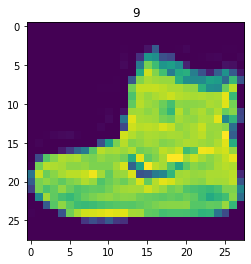

In [10]:
plt.imshow(X_train[0])
plt.title(y_train[0])

* Mas, se o Keras está acima do Tensorflow, porque não usamos o Tensorflow direto? Um aspecto da resposta é porque a maioria das implementações de projetos de Deep Learning se baseia em duas coisas: vetores e tensores.

* Se eu te pedir para me dizer quais as distâncias que juntas mostram onde o ponto vermelho está nesse gráfico:

![img](https://s3.amazonaws.com/caelum-online-public/982-tensorflow/image6.png)

* Você irá me dizer 5 cm, 12 cm, certo? E aí podemos agrupar esses números para facilitar, como (5,12);

* Esse agrupamento que descreve onde o ponto está, ou as suas coordenadas, é um vetor. E sim, o conceito de vetor que temos aqui é um conceito um pouco diferente daquele que aprendemos quando estudamos as disciplinas de Física ou Matemática.

* E, se olharmos para esse vetor (5, 12), temos 2 números que descrevem um ponto, mas podíamos ter 3 números, como nesse vértice do cubo.

![img2](https://s3.amazonaws.com/caelum-online-public/982-tensorflow/image2.png)

* E aí para descrevê-lo teríamos `vetor = (10,10,10)`. E esse vetor que usamos para descrever o ponto do cubo pode ser chamado também de tensor. Então tensor e vetor são a mesma coisa? Não, tensor é uma generalização que serve também para vetor, então todo vetor é um tensor, mas nem sempre podemos chamar um tensor de vetor.

* Repare que no gráfico temos 2 coordenadas para descrever o ponto, então temos 2 eixos e duas dimensões. Já, quando descrevemos o vértice do cubo temos 3 números, então 3 eixos e 3 dimensões;

* Um vetor vai ter duas dimensões, mas um tensor pode ter quantas dimensões quisermos. Agora, imagine declarar e configurar um tensor de 70.000 dimensões. Começa a ficar complicado. E imagine implementar cada algoritmo que vai rodar nesse tensor, vai levar um pouco mais de tempo. Estamos extrapolando nesse exemplo, muitas dessas coisas são facilitadas pelo próprio Tensorflow, mas podemos usar o Keras para abstrairmos e só dizermos o que a gente quer que o nosso modelo faça, deixando o Tensorflow se virar para fazer isso lá no baixo nível.

* Mas, não há apenas o Keras como API de Deep Learning, há também muitas outras como:

1. [Caffe](http://caffe.berkeleyvision.org/) do grupo de pesquisa da universidade de Berkeley,
2. [Torch](http://torch.ch/) uma implementação usando Lua,
3. [PyTorch](https://pytorch.org/) uma variação do Torch para Python,
4. [CNTK](https://docs.microsoft.com/en-us/cognitive-toolkit/) da Microsoft,
5. [DL4J](https://deeplearning4j.org/) uma implementação usando Java,
6. [MXNet](https://mxnet.incubator.apache.org/) da Apache.

> Cada uma delas tem as suas particularidades, é sempre legal experimentar e ver aquela com a qual se sente mais confortável.

* Além disso, tudo depende do objetivo do projeto. Se está desenvolvendo e testando um modelo, prototipando, é interessante usar uma API de alto nível para ganhar velocidade e descer de nível ao ter algo mais concreto para implementar à medida que for precisando obter mais controle sobre o modelo.

* Lembrando que, quanto mais a API for próxima da linguagem natural, menos controle você vai ter do que acontece por debaixo dos panos, e quanto mais próxima ela for do baixo nível ou dos tensores (um teste pode ser fazer uma implementação usando Tensorflow puro) mais controle você vai ter do modelo que for desenvolver.

In [11]:
y_train.min(), y_train.max()

(0, 9)

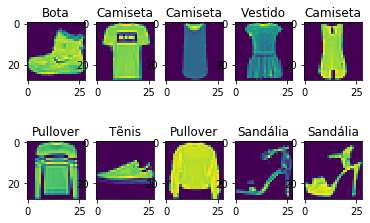

In [12]:
total_de_classificacoes = 10
nomes_de_classificacoes = {
    0:'Camiseta', 1:'Calça', 2:'Pullover', 3:'Vestido', 4:'Casaco',
    5:'Sandália', 6:'Camisa', 7:'Tẽnis', 8:'Bolsa', 9:'Bota'
}
for imagem in range(10):
  plt.subplot(2,5,imagem+1)
  plt.imshow(X_train[imagem])
  plt.title(nomes_de_classificacoes[y_train[imagem]])

* [Image manipulation and processing using Numpy and Scipy](http://scipy-lectures.org/advanced/image_processing/)

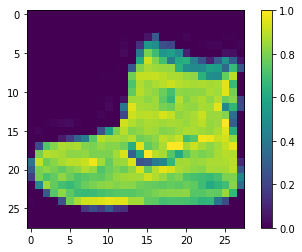

In [14]:
plt.imshow(X_train[0])
plt.colorbar()

# Criação e treino do modelo

In [53]:
# Criar e treinar modelo
modelo = keras.Sequential([
                           keras.layers.Flatten(input_shape=(28,28)), # 0 - entrada - camada 0
                           keras.layers.Dense(256, activation=tensorflow.nn.relu), # 1.1 - processamento - camada oculta
                           keras.layers.Dropout(0.2), # deixar camadas dormentes, tipo de normalização
                          #  keras.layers.Dense(128, activation=tensorflow.nn.relu), # 1.2 - processamento - camada oculta
                          #  keras.layers.Dense(64, activation=tensorflow.nn.relu), # 1.3 - processamento - camada oculta
                           keras.layers.Dense(10, activation=tensorflow.nn.softmax) # 2 - saida
])
modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
historico = modelo.fit(X_train, y_train, epochs=6, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/6
48000/48000 [==============================] - 6s 125us/sample - loss: 0.5288 - acc: 0.8105 - val_loss: 0.4473 - val_acc: 0.8268
Epoch 2/6
48000/48000 [==============================] - 6s 125us/sample - loss: 0.4005 - acc: 0.8539 - val_loss: 0.3615 - val_acc: 0.8717
Epoch 3/6
48000/48000 [==============================] - 6s 134us/sample - loss: 0.3608 - acc: 0.8676 - val_loss: 0.3515 - val_acc: 0.8756
Epoch 4/6
48000/48000 [==============================] - 6s 116us/sample - loss: 0.3400 - acc: 0.8750 - val_loss: 0.3423 - val_acc: 0.8779
Epoch 5/6
48000/48000 [==============================] - 6s 118us/sample - loss: 0.3225 - acc: 0.8798 - val_loss: 0.3231 - val_acc: 0.8836
Epoch 6/6
48000/48000 [==============================] - 6s 119us/sample - loss: 0.3087 - acc: 0.8856 - val_loss: 0.3292 - val_acc: 0.8816


# Visualização dos resultados

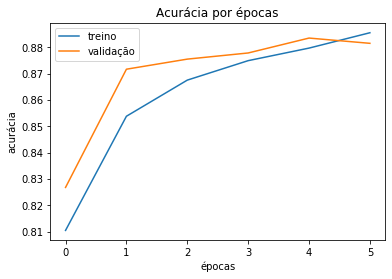

In [54]:
plt.plot(historico.history['acc'])
plt.plot(historico.history['val_acc'])
plt.title('Acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])

* Se a linha de treino vai bem e a de validação está baixando isso indica overfitting (o modelo entende mais treino do que validação

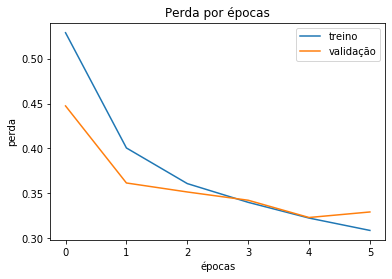

In [55]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino', 'validação'])

* Se na perda o erro de teste está muito menor do que o de validação também indica overfitting.

# Avaliação do modelo

In [21]:
# Avaliando manualmente
testes = modelo.predict(X_test)
resultados = np.argmax(testes[1])
resultados, y_test[1]


(2, 2)

In [41]:
# Avaliando: (perda, acuracia)
loss, acc = modelo.evaluate(X_test, y_test)
loss, acc

10000/10000 [==============================] - 0s 44us/sample - loss: 57.8855 - acc: 0.8771


(57.88551079169734, 0.8771)

# Salvando o modelo

In [0]:
# Salvar o modelo e fazer download
# No nome falamos o numero de epocas e camadas (nos)
modelo.save('modelo_epochs6_nos3.h5')
files.download('modelo_epochs6_nos3.h5')

In [0]:
# Para reabrir o modelo
modelo_salvo = load_model('modelo_epochs6_nos3.h5')


* O teste do modelo salvo foi feito [aqui](https://colab.research.google.com/drive/1xNj5FfRK78jL47QAlwhXrwDJY4H1YTZ3#scrollTo=DLclLK8NPR76)